# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang
Penyakit stroke merupakan kondisi serius yang terjadi akibat gangguan aliran darah ke otak, yang dapat menyebabkan kerusakan pada sel-sel otak dan memiliki potensi untuk mengancam nyawa serta kualitas hidup seseorang. Memahami faktor-faktor risiko yang terkait dengan stroke sangat penting dalam upaya pencegahan dan penanganan penyakit ini. Beberapa faktor risiko utama termasuk tekanan darah tinggi, penyakit jantung, gangguan kolesterol, merokok, diabetes, obesitas, dan gaya hidup tidak sehat. Mengetahui faktor-faktor ini memungkinkan untuk mengambil langkah-langkah pencegahan yang tepat, seperti pengelolaan tekanan darah, kontrol kolesterol, berhenti merokok, menjaga berat badan ideal, dan mengadopsi gaya hidup sehat secara umum.

Kemampuan untuk memprediksi risiko stroke juga merupakan hal yang penting dalam konteks manajemen klinis. Dengan menggunakan data klinis dan informasi mengenai faktor risiko, kita dapat mengembangkan model prediksi yang dapat mengidentifikasi individu yang berisiko tinggi mengalami stroke. Dengan pendekatan ini, intervensi dini dapat dilakukan untuk mengurangi risiko terjadinya stroke dan potensi komplikasi, sehingga membantu dalam meningkatkan kualitas hidup dan mengurangi beban penyakit secara keseluruhan.
## Tujuan Penelitian
Tujuan penelitian ini adalah untuk mengembangkan model prediksi risiko stroke berdasarkan data pasien, sehingga dapat membantu dalam identifikasi dini pasien yang berisiko mengalami stroke.
## Rumusan Masalah
Apa saja faktor-faktor risiko yang berkontribusi terhadap risiko stroke?
Bagaimana cara membangun model prediksi risiko stroke berdasarkan data klinis pasien?
Seberapa akurat model prediksi tersebut dalam memprediksi kemungkinan seseorang mengalami stroke?
## Data yang akan dipakai
Data yang akan digunakan berasal dari Kaggle dan berisi informasi tentang pasien-pasien yang telah mengalami atau belum mengalami stroke. Deskripsi atribut-atribut data sebagai berikut:
gender: Jenis kelamin pasien (Male, Female)
age: Usia pasien
hypertension: Apakah pasien memiliki hipertensi (0: Tidak, 1: Ya)
heart_disease: Apakah pasien memiliki penyakit jantung (0: Tidak, 1: Ya)
ever_married: Apakah pasien pernah menikah (No, Yes)
work_type: Jenis pekerjaan pasien (Children, Govt_job, Never_worked, Private, Self-employed)
Residence_type: Tipe tempat tinggal pasien (Rural, Urban)
avg_glucose_level: Rata-rata level glukosa dalam darah pasien
BMI: Indeks massa tubuh (Body Mass Index) pasien
smoking_status: Status merokok pasien (formerly smoked, never smoked, smokes, Unknown)
stroke: Apakah pasien pernah mengalami stroke (0: Tidak, 1: Ya)
## Metode
1. Persiapan Data:
Memuat dataset yang berisi informasi pasien seperti jenis kelamin, usia, riwayat hipertensi, riwayat penyakit jantung, status pernikahan, jenis pekerjaan, tipe tempat tinggal, rata-rata level glukosa darah, BMI (Indeks Massa Tubuh), dan status merokok.
Melakukan pembersihan data untuk mengatasi nilai yang hilang, mengatasi outlier, dan mengubah format data agar dapat digunakan dalam analisis.

2. Exploratory Data Analysis (EDA):
Melakukan analisis statistik deskriptif untuk memahami distribusi dan karakteristik data.
Membuat visualisasi data seperti histogram, boxplot, dan scatter plot untuk melihat hubungan antar variabel.
Mengidentifikasi korelasi antar variabel menggunakan heatmap atau matriks korelasi.

3. Preprocessing Data:
Mengkodekan variabel kategorikal menjadi bentuk numerik menggunakan teknik seperti Label Encoding atau One-Hot Encoding.
Melakukan penskalaan fitur (feature scaling) jika diperlukan untuk menyamakan rentang nilai variabel.

4. Model Training:
Membagi dataset menjadi data latih (training data) dan data uji (test data) menggunakan teknik pembagian data.
Menggunakan berbagai algoritma machine learning seperti Regresi Logistik, Pohon Keputusan, Random Forest, atau Jaringan Saraf Tiruan untuk melatih model prediksi risiko stroke.

5. Model Evaluation:
Mengevaluasi performa model menggunakan metrik evaluasi seperti akurasi, presisi, recall, F1-score, dan matriks kebingungan (confusion matrix).
Membandingkan performa berbagai model untuk memilih model yang paling baik dalam memprediksi risiko stroke.

6. Model Selection:
Memilih model terbaik berdasarkan hasil evaluasi dan validasi untuk digunakan dalam memprediksi risiko stroke pada data baru.

7. Conclusion:
Membuat kesimpulan berdasarkan temuan dari analisis data dan evaluasi model.
Memberikan rekomendasi atau implikasi dari hasil penelitian untuk aplikasi klinis atau pencegahan penyakit stroke.

# Preparation | Persiapan
## Import Libraries

In [51]:
# Import library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Import library untuk pembangunan model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Get Data | Mendapatkan Data

In [52]:
# Membaca dataset dari file CSV ('brain_stroke.csv') dan menyimpannya ke dalam DataFrame 'data'
data = pd.read_csv('brain_stroke.csv')

# Menampilkan beberapa baris pertama data untuk melihat contoh data awal
print(data.head())

# Menampilkan informasi mengenai dataset, termasuk tipe data dan nilai-nilai non-null
print(data.info())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           

Kesimpulan dari Informasi Dataset :
Dataset terdiri dari 4981 entri atau baris data.
Terdapat 11 kolom yang mencakup informasi tentang pasien dan faktor-faktor terkait risiko stroke.
Mayoritas variabel adalah numerik (3 kolom float64 dan 3 kolom int64) kecuali variabel kategorikal yang direpresentasikan sebagai objek (5 kolom).
Tidak ada nilai yang hilang (non-null count sama dengan jumlah baris), sehingga tidak perlu dilakukan langkah imputasi untuk data yang hilang
Jumlah Baris: 4981
Jumlah Kolom: 11
Tipe Data:

    Numerik:
    age: Usia pasien (float64)
    hypertension: Memiliki hipertensi atau tidak (int64)
    heart_disease: Memiliki penyakit jantung atau tidak (int64)
    avg_glucose_level: Rata-rata level glukosa darah (float64)
    bmi: Indeks Massa Tubuh (float64)
    stroke: Status stroke (int64)
    
    Kategorikal:
    gender: Jenis kelamin pasien (object)
    ever_married: Pernah menikah atau tidak (object)
    work_type: Jenis pekerjaan (object)
    Residence_type: Tipe tempat tinggal (object)
    smoking_status: Status merokok (object)

## Explore Data (EDA) | Eksplorasi Data


Statistik deskriptif untuk variabel numerik:
            gender           age  hypertension  heart_disease  ever_married  \
count  4981.000000  4.981000e+03   4981.000000    4981.000000   4981.000000   
mean      0.416382  2.853012e-18      0.096165       0.055210      0.658502   
std       0.493008  1.000100e+00      0.294848       0.228412      0.474260   
min       0.000000 -1.912575e+00      0.000000       0.000000      0.000000   
25%       0.000000 -8.128627e-01      0.000000       0.000000      0.000000   
50%       0.000000  6.973111e-02      0.000000       0.000000      1.000000   
75%       1.000000  7.758062e-01      0.000000       0.000000      1.000000   
max       1.000000  1.702530e+00      1.000000       1.000000      1.000000   

       avg_glucose_level           bmi       stroke  
count       4.981000e+03  4.981000e+03  4981.000000  
mean        1.141205e-17  1.711807e-17     0.049789  
std         1.000100e+00  1.000100e+00     0.217531  
min        -1.127637e+00 -

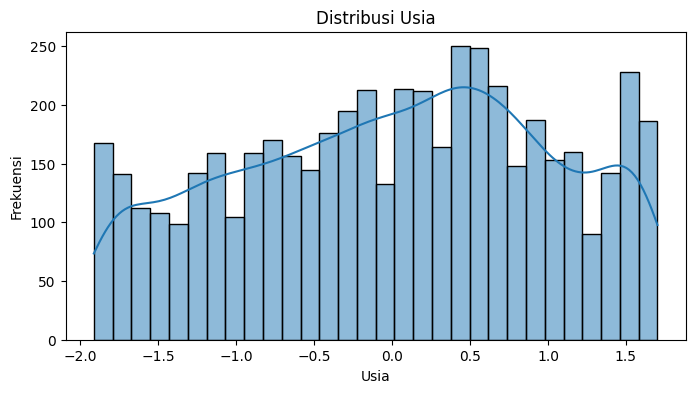

In [78]:
# Statistik deskriptif untuk variabel numerik
print("\nStatistik deskriptif untuk variabel numerik:")
print(data.describe())

# Visualisasi distribusi variabel numerik menggunakan histogram
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

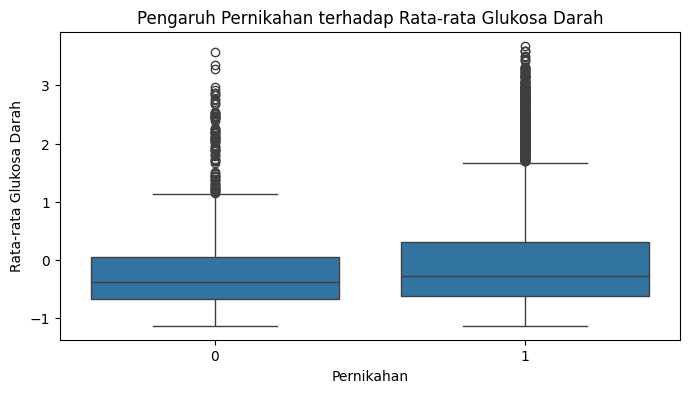

In [79]:
# Boxplot untuk melihat distribusi variabel numerik
plt.figure(figsize=(8, 4))
sns.boxplot(x='ever_married', y='avg_glucose_level', data=data)
plt.title('Pengaruh Pernikahan terhadap Rata-rata Glukosa Darah')
plt.xlabel('Pernikahan')
plt.ylabel('Rata-rata Glukosa Darah')
plt.show()

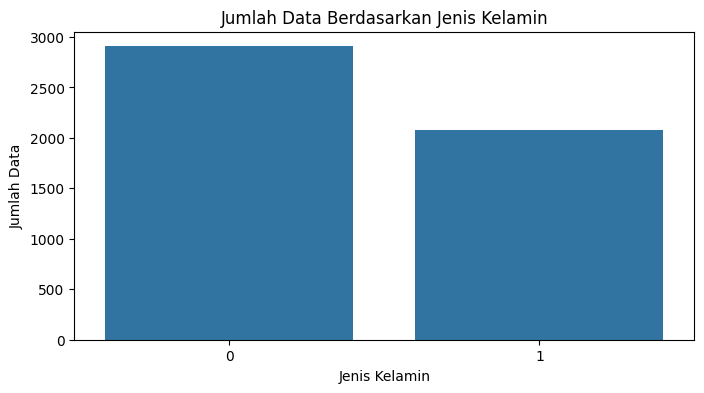

In [80]:
# Bar plot untuk variabel kategorikal (jenis kelamin)
plt.figure(figsize=(8, 4))
sns.countplot(x='gender', data=data)
plt.title('Jumlah Data Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Data')
plt.show()

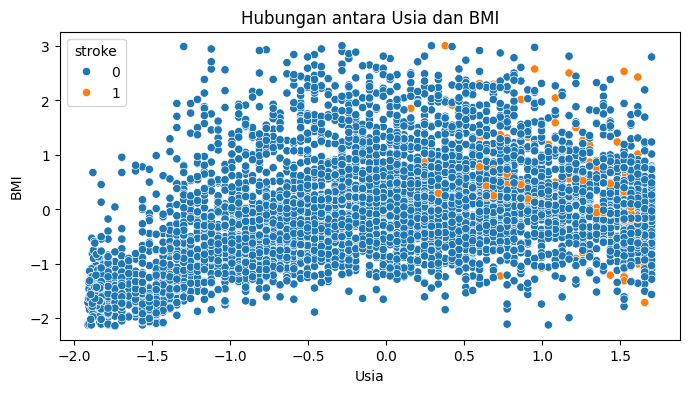

In [81]:
# Scatter plot untuk melihat hubungan antara usia dan BMI
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='bmi', hue='stroke', data=data)
plt.title('Hubungan antara Usia dan BMI')
plt.xlabel('Usia')
plt.ylabel('BMI')
plt.show()

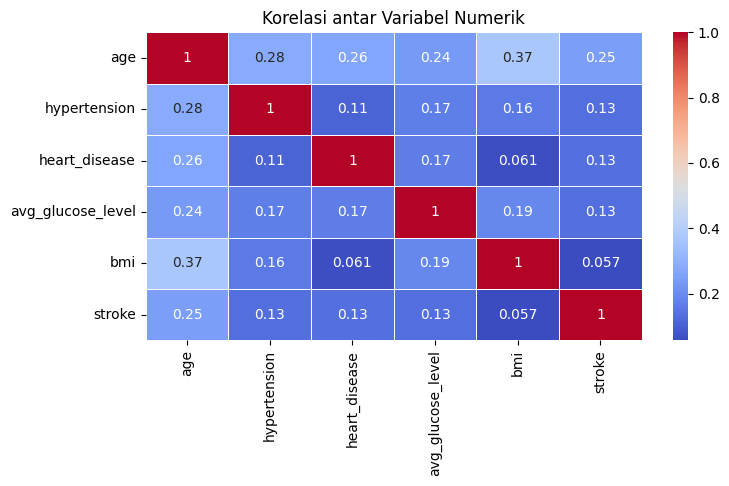

In [82]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Membaca dataset
data = pd.read_csv('brain_stroke.csv')

# Konversi variabel kategorikal menjadi numerik
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

# Pilih subset variabel numerik untuk heatmap
numeric_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_data = data[numeric_vars]

# Heatmap untuk melihat korelasi antar variabel numerik
plt.figure(figsize=(8, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Variabel Numerik')
plt.show()

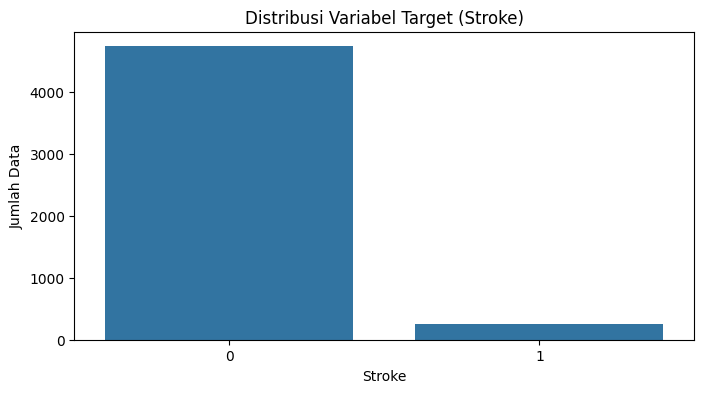

In [83]:
# Analisis variabel target (stroke)
plt.figure(figsize=(8, 4))
sns.countplot(x='stroke', data=data)
plt.title('Distribusi Variabel Target (Stroke)')
plt.xlabel('Stroke')
plt.ylabel('Jumlah Data')
plt.show()

## Clean Data | Membersihkan Data

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identifikasi missing values
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [60]:
data.duplicated().sum()

0

In [61]:
data.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [62]:
import pandas as pd
from scipy import stats

# removing outliers
def remove_outliers(column):
    # calculating the quantiles for each column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # calculating lower limit and upper limit
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    return lower_limit, upper_limit

# Model Training | Pelatihan Model

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Membaca dataset
data = pd.read_csv('cleaned_data.csv')

# Penanganan nilai yang hilang
data['age'].fillna(data['age'].mean(), inplace=True)  # Imputasi missing values dengan mean

# Encoding variabel kategorikal
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  # Label Encoding

# Scaling variabel numerik
scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])

# Memisahkan data menjadi data latih dan data uji
X = data.drop('stroke', axis=1)  # Variabel prediktor (fitur)
y = data['stroke']  # Variabel target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan informasi setelah preprocessing
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (3984, 14)
Ukuran data uji: (997, 14)


C:\Users\User\AppData\Local\Temp\ipykernel_19356\2108211325.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)  # Imputasi missing values dengan mean


In [64]:
sc = StandardScaler()

x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.fit_transform(X_test)

# Model Evaluation | Evaluasi Model

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf_tree = DecisionTreeClassifier()

In [67]:
clf_tree.fit(x_train_sc, y_train)

DecisionTreeClassifier()

In [68]:
clf_tree.score(x_test_sc, y_test)

0.9207622868605817

In [69]:
clf_forest = RandomForestClassifier(n_estimators = 3)

In [70]:
clf_forest.fit(x_train_sc, y_train)

RandomForestClassifier(n_estimators=3)

In [71]:
clf_forest.score(x_test_sc, y_test)

0.9327983951855566

In [72]:
clf_gd = GradientBoostingClassifier(n_estimators = 3)

In [73]:
clf_gd.fit(x_train_sc, y_train)

GradientBoostingClassifier(n_estimators=3)

In [74]:
clf_gd.score(x_test_sc, y_test)

0.9458375125376128

In [75]:
clf_lr = LogisticRegression()

In [76]:
clf_lr.fit(x_train_sc, y_train)

LogisticRegression()

In [77]:
clf_lr.score(x_test_sc, y_test)

0.9458375125376128

## Model Selection | Pemilihan Model

## Conclusion | Kesimpulan